Mounted at /content/drive


<ipython-input-259-c44cb2d2551f>:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='Region', y='Score', palette='Set2', ax=ax9).set(title='World Happiness Report')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'East Asia & Pacific'),
  Text(1, 0, 'Europe & Central Asia'),
  Text(2, 0, 'Latin America & Caribbean'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa')])

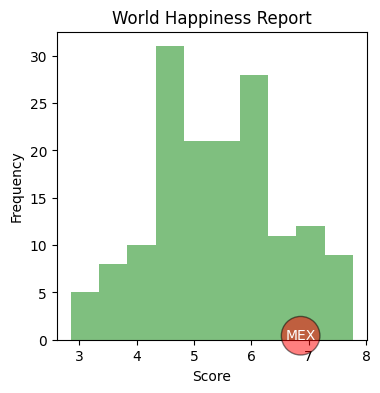

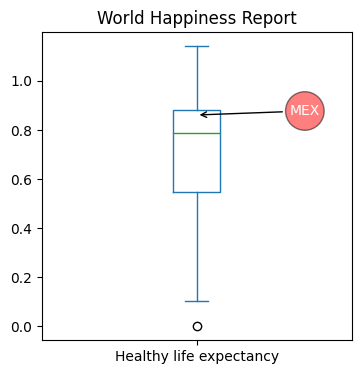

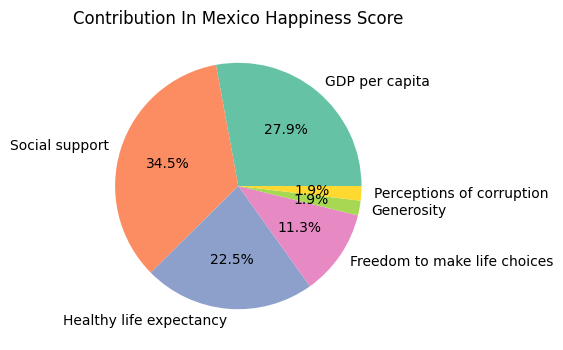

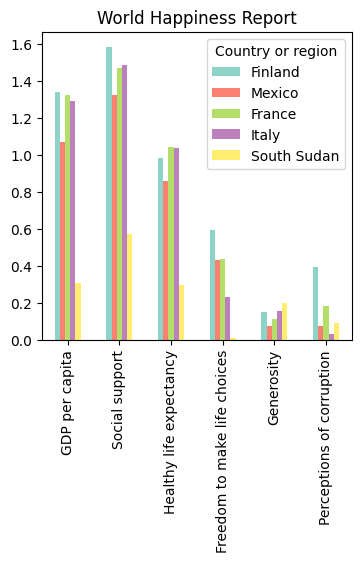

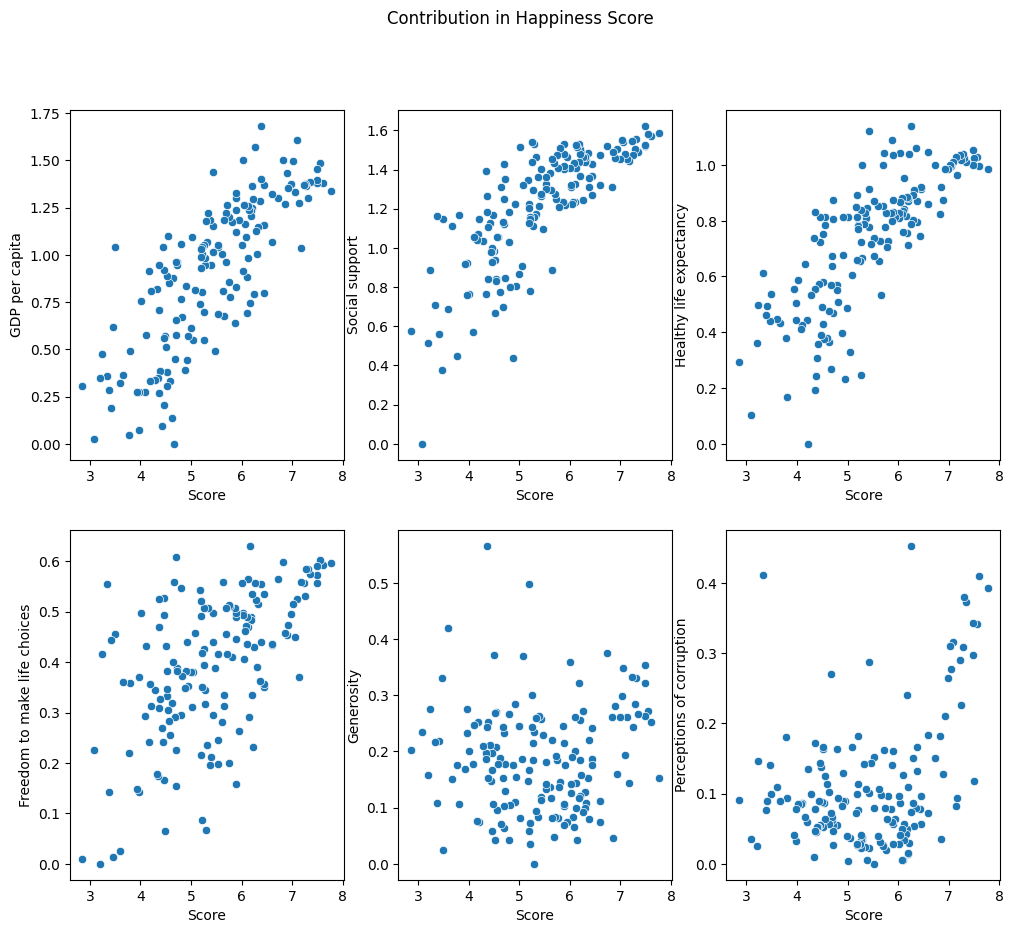

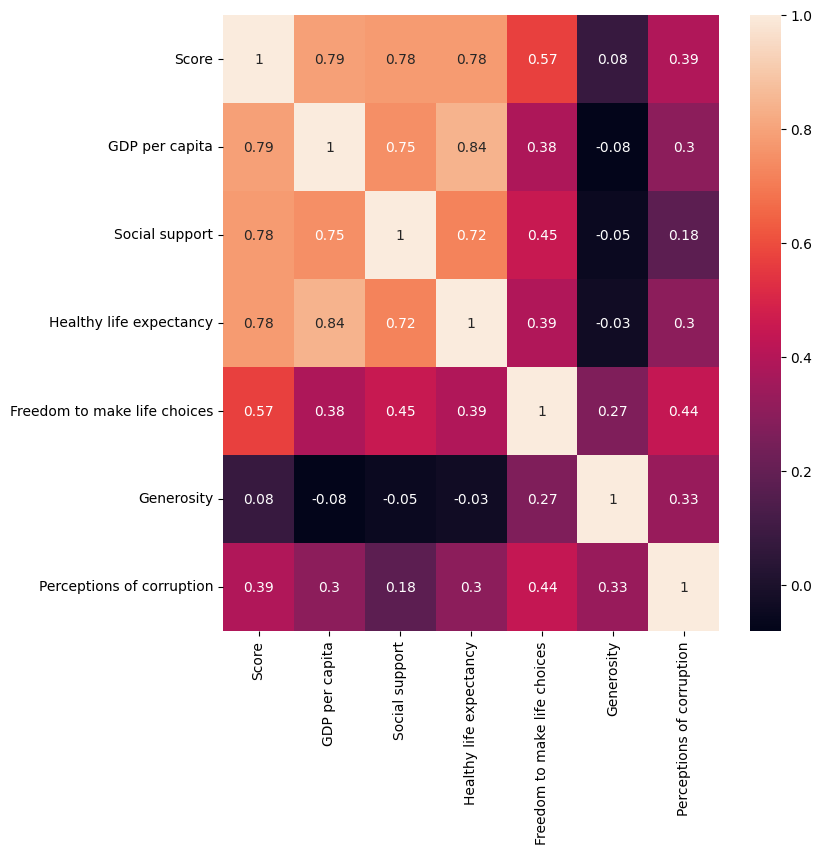

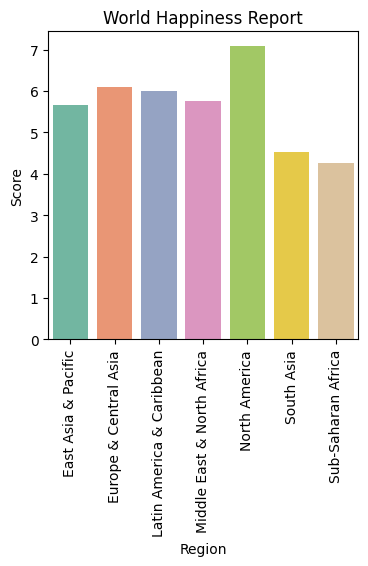

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import numpy as np

# 0. Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.
happiness = pd.read_csv("/content/drive/MyDrive/M7/Reto/Happiness_report.csv")
metadata  = pd.read_csv("/content/drive/MyDrive/M7/Reto/Metadata.csv")

# 3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México.
#     Haz que la columna Country or region quede como índice
mexico = happiness.loc[(happiness['Country or region']=='Mexico')]
mexico.set_index('Country or region',inplace=True)

#################################################################################################################

# 4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.
fig,ax4 = plt.subplots(figsize=(4,4))
# 4.1 Primero el valor del índice de felicidad en México así como también definimos las propiedades para la caja y tipo de letra
mex_happiness = mexico['Score'].to_list()[0]

box_properties = { 'boxstyle': 'circle'
                  ,'facecolor': 'red'
                  ,'alpha': 0.5
                 }

font_properties ={ 'weight':18
                  ,'color':'white'
                 }

# 4.2 Dibujamos el histograma
ax4.set_title('World Happiness Report')
plt.hist(happiness['Score'], color='green', alpha=0.5)
plt.xlabel("Score")
plt.ylabel('Frequency')


# 4.3 Dibujamos la etiqueta usando las propiedades definidas
plt.text(mex_happiness,0,'MEX',bbox=box_properties, fontdict=font_properties)

#################################################################################################################

# 5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación
fig,ax5 = plt.subplots(figsize=(4,4))
# 5.1 Guardamos el valor de la esperanza de vida de los mexicanos en la variable mex_life_exp
mex_life_exp = mexico['Healthy life expectancy'].to_list()[0]

# 5.2 Graficamos el boxplot
happiness['Healthy life expectancy'].plot.box(ax=ax5,title='World Happiness Report')

# 5.3 Creamos la flecha apuntando al valor de México usando las propiedades de la caja ya definida anteriormente
plt.annotate( 'MEX'
             ,xy=(1,mex_life_exp)
             ,xytext = (1.3,mex_life_exp)
             ,arrowprops=dict(arrowstyle='->')
             ,bbox=box_properties
             ,color='white'
            )

#################################################################################################################

# 6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.
fig,ax6 = plt.subplots(figsize=(4,4))
# 6.1 Primero hacemos una transpuesta del dataframe mexico y lo ponemos en un nuevo dataframe llamado mexicoFactors
mexicoFactors=mexico.T
mexicoFactors.rename(columns={'Mexico':'Factors'}, inplace=True)

# 6.2 Eliminamos los registros que no necesitan ser graficaos
mexicoFactors= mexicoFactors.drop(['Overall rank','Score'], axis=0)

# 6.3 Generamos la gráfica de pie
mexicoFactors.plot.pie( y='Factors'
                       ,autopct='%1.1f%%'
                       ,title='Contribution In Mexico Happiness Score'
                       ,ylabel=''
                       ,legend=False
                       ,colors=sns.color_palette('Set2')
                       ,ax=ax6
                      )

#################################################################################################################

# 7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés)
# y visualiza en una misma gráfica los 6 factores.
fig,ax7 = plt.subplots(figsize=(4,4))
# 7.1 Primero obtenemos los valores mínimos y máximos de felicidad para posteriormente mostrar los paises con esas calificaciones
MaxHappy = happiness['Score'].max()
MinHappy = happiness['Score'].min()

# 7.1 Obtenemos el país más feliz, el menos feliz, México y dos más
TopHappiness = happiness.loc[(happiness['Score']== MaxHappy) |
                             (happiness['Score']== MinHappy) |
                             (happiness['Country or region']=='Mexico') |
                             (happiness['Country or region']=='France') |
                             (happiness['Country or region']=='Italy')
                            ].loc[:,:]

# 7.2 Quitamos las columnas que no son necesarias graficar y transformamos el dataset para que pueda ser graficado
TopHappiness= TopHappiness.drop(['Overall rank','Score'], axis=1)
TopHappiness.set_index('Country or region',inplace=True)
TopHappiness=TopHappiness.T

# 7.3 Graficamos
TopHappiness.plot(kind='bar', title = 'World Happiness Report', colormap='Set3', ax=ax7)

#################################################################################################################

# 8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores,
#     para determinar qué factor influye más en la evaluación
# 8.1 Creamos la subgráficas de 2 x 3
fig,axs = plt.subplots(2,3, figsize=(12,10))

# 8.2 Graficamos los scatter plots del puntaje (score) versus los 6 factores
fig.suptitle('Contribution in Happiness Score')
sns.scatterplot(data=happiness, ax=axs[0,0], x= 'Score',y='GDP per capita')
sns.scatterplot(data=happiness, ax=axs[0,1], x= 'Score',y='Social support')
sns.scatterplot(data=happiness, ax=axs[0,2], x= 'Score',y='Healthy life expectancy')
sns.scatterplot(data=happiness, ax=axs[1,0], x= 'Score',y='Freedom to make life choices')
sns.scatterplot(data=happiness, ax=axs[1,1], x= 'Score',y='Generosity')
sns.scatterplot(data=happiness, ax=axs[1,2], x= 'Score',y='Perceptions of corruption')

# 8.3 Comprueba lo anterior con un heatmap donde incluyas los índices de correlación
fig,ax8 = plt.subplots(figsize=(8,8))
sns.heatmap(round(happiness[['Score',
                             'GDP per capita',
                             'Social support',
                             'Healthy life expectancy',
                             'Freedom to make life choices',
                             'Generosity',
                             'Perceptions of corruption'
                            ]].corr()
                  ,2
                 )
              ,annot=True
              ,ax=ax8
           )

#################################################################################################################

# 9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.
fig,ax9 = plt.subplots(figsize=(4,4))

# 9.1 Combinamos happiness con metada
merged = pd.merge( left=happiness
                  ,right=metadata
                  ,left_on='Country or region'
                  ,right_on='TableName'
                 )[['Region','Score']].groupby(['Region']).mean()[['Score']]

# 9.2 Generamos la gráfica
sns.barplot(data=merged, x='Region', y='Score', palette='Set2', ax=ax9).set(title='World Happiness Report')
plt.xticks(rotation=90)